##Load Required Libraries
Import the necessary libraries for analysis and visualization.

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Step 1: Load and preprocess the data
loan_data = pd.read_csv("/content/loan_data.csv")  # Replace with your dataset path
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


##Data Preprocesing

In [7]:
loan_data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [8]:
# check the Null / Missing values
loan_data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [9]:
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [10]:

import pandas as pd

# Assuming you have a DataFrame called df with a column 'loan_int_rate'
# Example: df = pd.read_csv('your_dataset.csv')

# Calculate the ran_e of the 'loan_int_rate' column
a_min = loan_data['loan_int_rate'].max()
b_max = loan_data['loan_int_rate'].min()
print(a_min, b_max)


20.0 5.42


In [11]:
# Encode Categorical Columns (if not already encoded).

# convert categorical data into Numerical data before scaling
loan_data.replace({
                    'person_gender':{'female':0, 'male':1},
                     'person_education':{'High School':0, 'Bachelor':1,'Associate':2,'Master':3, 'Doctorate':4},
                      'person_home_ownership':{'RENT':0, 'MORTGAGE': 1, 'OWN':2, 'OTHER':3},
                     'previous_loan_defaults_on_file': {'No':0, 'Yes':1},
                    'loan_intent': {'EDUCATION':0,'MEDICAL':1, 'VENTURE':2, 'PERSONAL':3, 'DEBTCONSOLIDATION': 4,
                                        'HOMEIMPROVEMENT': 5 }},
                  inplace=True)

<ipython-input-11-5dba2d2a0c58>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({


##Define Features and Target Variable
Split your data into independent variables (X) and dependent variable (y).


In [12]:
# Assuming `loan_data` is your DataFrame
X = loan_data.drop(columns=['loan_status'])  # Features
y = loan_data['loan_status']  # Target variable

##Split Data into Training and Testing Sets
Use an 80-20 split for training and testing.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Corrected order of variables
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(36000, 13) (36000,)
(9000, 13) (9000,)


##Train a Random Forest Classifier
Fit a Random Forest model to the training data.

In [14]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import accuracy_score

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy:.2f}')

Classification Accuracy: 0.93


In [16]:
train_accuracy = rf_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = rf_model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.93


## Train The cross-validation

In [17]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.92066667 0.91811111 0.918      0.93111111 0.93644444]
Mean CV Accuracy: 0.92


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ... (rest of the imports)

# Calculate predicted probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)  # Now using the defined variable

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

Accuracy: 0.93
Precision: 0.89
Recall: 0.78
F1 Score: 0.83
AUC-ROC: 0.97





### **Interpretation of Each Metric**
1. **Accuracy: 0.93**  
   - **Meaning**: The model correctly predicted **93% of all loan statuses**.  
   - **Insight**: The model is performing well overall, but accuracy alone isn’t enough, especially if the dataset is imbalanced (e.g., far more approved loans than rejected loans).

2. **Precision: 0.89**  
   - **Meaning**: Of all the loans the model predicted as "approved," **89% were correct.**
   - **Insight**: Precision is high, meaning the model is good at minimizing false positives (i.e., predicting a loan will be approved when it won't be).

3. **Recall: 0.78**  
   - **Meaning**: The model correctly identified **78% of all loans that were actually approved.**
   - **Insight**: The model misses some actual approved loans, indicating that it has false negatives (loans that are "approved" but predicted as "not approved").

4. **F1 Score: 0.83**  
   - **Meaning**: The F1 Score balances **precision and recall** and provides a single performance measure.  
   - **Insight**: A score of 0.83 indicates a good balance between precision and recall, meaning the model is neither overly conservative (low recall) nor too lenient (low precision).

5. **AUC-ROC: 0.97**  
   - **Meaning**: The AUC-ROC score measures the model's ability to distinguish between the classes (approved vs. not approved).  
   - **Insight**: A value of **0.97** is excellent, showing the model can differentiate between approved and not-approved loans with high confidence.

---

### **Overall Assessment**
- The model is performing **very well**.  
- Its high **accuracy (93%)** and **AUC-ROC (97%)** indicate the model makes reliable predictions.  
- While precision (89%) is excellent, recall (78%) could be improved slightly to catch more actual approved loans.

---

### **Recommendations**
1. **If false negatives are costly (e.g., missing approved loans)**:
   - Improve **recall** by adjusting the classification threshold. For example, lower the threshold for predicting "approved" to ensure more actual approved loans are identified.
   - Use **SMOTE** or other resampling techniques if the data is imbalanced.

2. **If false positives are costly (e.g., approving risky loans)**:
   - Maintain the focus on **precision** by leaving the threshold as is or increasing it to ensure higher confidence in approved loans.

3. **Tune Hyperparameters**: Perform hyperparameter tuning for Random Forest (e.g., `max_depth`, `n_estimators`, `min_samples_split`) to potentially improve recall and F1 score further.

##Extract Feature Importance
Retrieve feature importance scores from the trained Random Forest model.

In [19]:
# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)
print(importance_df)

                           Feature  Importance
1                    person_gender    0.007816
2                 person_education    0.016870
10      cb_person_cred_hist_length    0.024938
4                   person_emp_exp    0.027051
0                       person_age    0.029502
7                      loan_intent    0.036417
11                    credit_score    0.055799
6                        loan_amnt    0.059143
5            person_home_ownership    0.068610
3                    person_income    0.125442
8                    loan_int_rate    0.157908
9              loan_percent_income    0.164746
12  previous_loan_defaults_on_file    0.225758


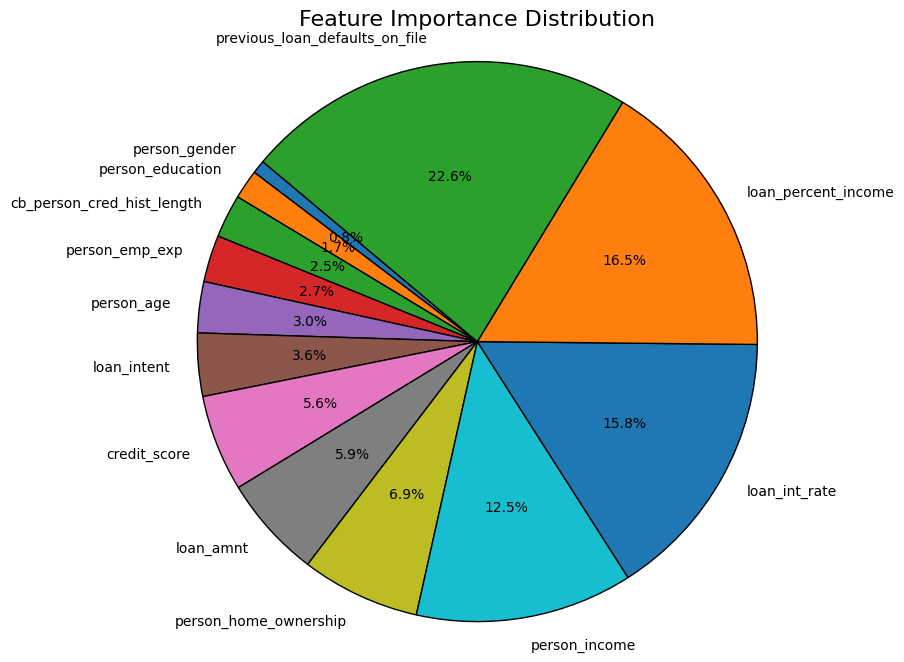

In [20]:
import matplotlib.pyplot as plt

# Data for the pie chart
features = importance_df['Feature']
importances = importance_df['Importance']

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    importances,
    labels=features,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# Add a title
plt.title("Feature Importance Distribution", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


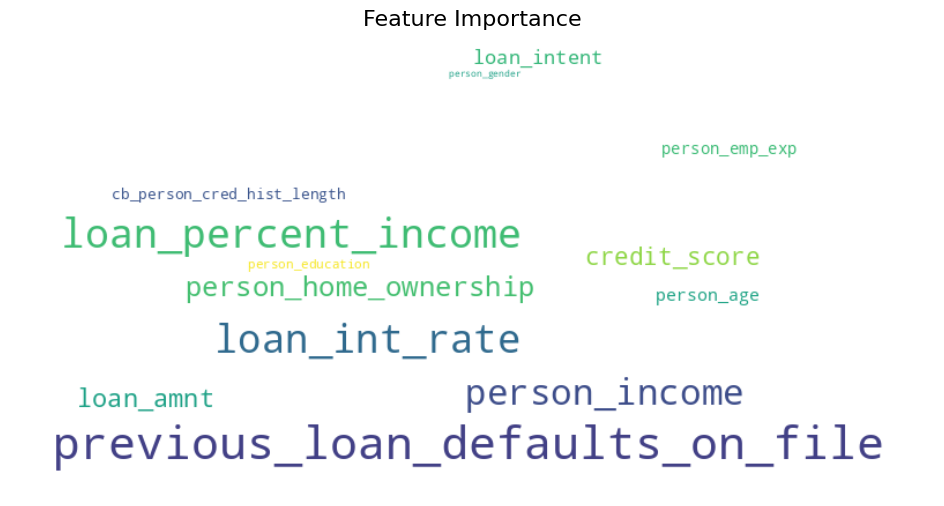

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Data: Feature Importance

# Convert DataFrame to dictionary before generating WordCloud
frequencies = importance_df.set_index('Feature')['Importance'].to_dict()

# Generate WordCloud
wordcloud = WordCloud(
    background_color="white",
    width=800,
    height=400,
    colormap="viridis"
).generate_from_frequencies(frequencies)

# Plot WordCloud
plt.figure(figsize=(16, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Feature Importance", fontsize=16)
plt.show()

The most influential factor is not **"credit_score"** because, based on the feature importance values provided in the data:

1. **Previous Loan Defaults on File** has the highest importance score (0.225758). This indicates that a history of previous loan defaults plays the most significant role in predicting loan status. A borrower with a history of defaults is likely a key indicator of risk, making this feature highly predictive.

2. While **"credit_score"** is important (0.055799), it has a lower importance score compared to other features like:
   - Loan Percent Income (0.164746)
   - Loan Interest Rate (0.157908)
   - Person Income (0.125442)
   
   These factors might have a more direct or substantial impact on loan approval decisions or repayment likelihood than the credit score alone.

### Why "credit_score" is not the most important:
- Credit score represents a general creditworthiness measure, but other factors like **income-to-loan ratio**, **interest rate**, and **previous loan defaults** may provide more precise or context-specific insights into the borrower's ability to repay a loan.
- Machine learning models consider all features and their interactions, and the scoring reflects the combined predictive power of these features rather than a single variable.

If you still feel credit score should have a higher influence, it could depend on:
- The feature engineering process
- The specific dataset and correlations
- The model used and its way of evaluating feature importance

# Hear the Graphicaly representation to identify the most important future

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import bar

# Sample DataFrame for feature importance (replace this with your `importance_df`)
importance_df = pd.DataFrame({
    'Feature': [
        'person_gender', 'person_education', 'cb_person_cred_hist_length',
        'person_emp_exp', 'person_age', 'loan_intent', 'credit_score',
        'loan_amnt', 'person_home_ownership', 'person_income',
        'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file'
    ],
    'Importance': [
        0.007816, 0.016870, 0.024938, 0.027051, 0.029502, 0.036417, 0.055799,
        0.059143, 0.068610, 0.125442, 0.157908, 0.164746, 0.225758
    ]
}).sort_values(by='Importance', ascending=True)

# Plot interactive graph using Plotly
fig = bar(
    importance_df,
    x="Importance",
    y="Feature",
    orientation='h',
    title="Feature Importance",
    color="Importance",
    color_continuous_scale='Viridis',
    labels={"Importance": "Feature Importance", "Feature": "Feature Names"},
    template="plotly_white"
)
fig.update_layout(
    title_font_size=18,
    xaxis_title="Importance",
    yaxis_title="Features",
    yaxis=dict(title_font=dict(size=16)),
    xaxis=dict(title_font=dict(size=16))
)

# Show interactive plot
fig.show()

# Optionally, save the plotly visualization as HTML
fig.write_html("feature_importance_plot.html")

##Interpretation


*   The bar plot shows the relative importance of each feature in determining loan status.

*   Features with higher importance scores have more influence on the model’s predictions.

*For example:
   If previous_loan_defaults_on_file has the highest importance, it means borrowers with good credit scores are less likely to default.

##Insights and Business Use Case
**Top Features**: Highlight the features with the highest importance.

**Business Implications**: Banks can use these insights to:

*  Focus on applicants' previous_loan_defaults_on_file, credit scores and income levels for loan approvals.

*  Build rules for rejecting loans based on less important factors.

# XGBClassifier

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and fit XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)  # X_train and y_train need to be defined

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
print("XGBClassifier")
print("Accuracy:", xgb_model.score(X_test, y_test)* 100)
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob)*100)
print(classification_report(y_test, y_pred))

XGBClassifier
Accuracy: 93.35555555555555
AUC-ROC: 97.82108769457435
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



# LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

# Initialize and fit LightGBM model
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lgb_model.predict(X_test)
y_pred_prob = lgb_model.predict_proba(X_test)[:, 1]

print("LGBMClassifier")
print("Accuracy:", lgb_model.score(X_test, y_test))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
LGBMClassifier
Accuracy: 0.9316666666666666
AUC-ROC: 0.976472216884106
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



# MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize and fit MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp_model.predict(X_test)
y_pred_prob = mlp_model.predict_proba(X_test)[:, 1]

print("MLPClassifier")
print("Accuracy:", mlp_model.score(X_test, y_test))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))
print(classification_report(y_test, y_pred))

MLPClassifier
Accuracy: 0.8325555555555556
AUC-ROC: 0.857169944270066
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      6990
           1       0.90      0.28      0.43      2010

    accuracy                           0.83      9000
   macro avg       0.86      0.64      0.67      9000
weighted avg       0.84      0.83      0.80      9000



Random Forest is commonly used for **Feature Importance Analysis** due to its robust methodology, but there are other algorithms that can also determine feature importance effectively. Here's why Random Forest is a popular choice and a comparison with other algorithms:

---

### **Why Use Random Forest for Feature Importance?**

1. **Inherent Feature Importance Calculation:**
   - Random Forest calculates feature importance by evaluating how much each feature reduces the impurity (e.g., Gini impurity or entropy) of splits in the decision trees. This makes it straightforward to rank features.
   
2. **Handles Non-Linearity:**
   - Random Forest can capture complex interactions between features, providing more accurate importance scores for features in datasets with non-linear relationships.

3. **Robust to Outliers and Noise:**
   - Being an ensemble method, Random Forest is less sensitive to noise and outliers, ensuring reliable feature importance values.

4. **Works with Categorical and Numerical Data:**
   - Random Forest naturally supports mixed data types without extensive preprocessing.

5. **Interpretability:**
   - The importance values are easily interpretable and can be visualized, as you did in your bar plot.

6. **Low Overfitting Risk:**
   - By aggregating results from multiple decision trees, Random Forest reduces overfitting, which ensures that feature importance is generalized and not dataset-specific.

---

### **Why Not Use Other Algorithms?**

#### 1. **Logistic Regression:**
   - **How It Works:** Provides feature importance through coefficients (absolute values of weights).
   - **Limitations:**
     - Assumes linear relationships between features and target, which might not hold true in your dataset.
     - Cannot handle feature interactions unless explicitly modeled.
   - **Use Case:** Works well when the data is linearly separable and simple.

#### 2. **XGBoost/Gradient Boosting:**
   - **How It Works:** Calculates importance using gain, frequency, or cover metrics for each feature.
   - **Limitations:**
     - Computationally more intensive compared to Random Forest.
     - Can be harder to interpret than Random Forest due to the use of boosting techniques.
   - **Use Case:** Provides better performance in datasets where boosting outperforms bagging.

#### 3. **Decision Trees:**
   - **How It Works:** Similar to Random Forest but based on a single tree.
   - **Limitations:**
     - High risk of overfitting, leading to less reliable feature importance.
     - Not as robust as Random Forest due to the absence of an ensemble approach.
   - **Use Case:** Useful for quick prototyping in small datasets.

#### 4. **Permutation Importance:**
   - **How It Works:** Measures feature importance by shuffling feature values and checking the decrease in model performance.
   - **Limitations:**
     - Computationally expensive, especially for large datasets.
     - Importance is model-agnostic but does not capture interactions as effectively as Random Forest.
   - **Use Case:** When you want a model-agnostic approach to feature importance.

#### 5. **SHAP (SHapley Additive exPlanations):**
   - **How It Works:** Uses game theory to calculate feature importance by attributing the contribution of each feature to model predictions.
   - **Limitations:**
     - Computationally expensive, especially for large datasets or complex models.
     - Requires more expertise to interpret compared to Random Forest's impurity-based method.
   - **Use Case:** When a detailed explanation of feature contributions is needed.

---

### **Why Random Forest Is Preferred for This Task**
- Your goal is to **identify the most important features for loan classification**. Random Forest is:
  - Robust to dataset variations (e.g., noise, outliers).
  - Efficient in handling interactions and non-linear relationships in the data.
  - Easy to interpret and visualize the feature importance, which aligns with the requirements of your task.

If you need higher precision or a different perspective, you can cross-check Random Forest results using complementary methods like **SHAP values** or **XGBoost feature importance** for a deeper understanding of the data.

## (Optional) Hyperparameter Tuning
You can improve the model’s performance and refine feature importance using hyperparameter tuning.



In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 5, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.9s
[CV] END max_depth=

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% validation, 15% test


# Predict on training and validation data
y_train_pred = best_rf_model.predict(X_train)
y_val_pred = best_rf_model.predict(X_val)

# Training accuracy
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Validation accuracy
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Training Accuracy: 0.9885396825396825
Validation Accuracy: 0.9471111111111111


In [27]:
# Classification report
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5286
           1       0.92      0.83      0.87      1464

    accuracy                           0.95      6750
   macro avg       0.94      0.90      0.92      6750
weighted avg       0.95      0.95      0.95      6750

Confusion Matrix:
[[5179  107]
 [ 250 1214]]


In [28]:
# Predict on test data
y_test_pred = best_rf_model.predict(X_test)

# Test accuracy and report
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.9448888888888889
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5207
           1       0.92      0.84      0.87      1543

    accuracy                           0.94      6750
   macro avg       0.93      0.91      0.92      6750
weighted avg       0.94      0.94      0.94      6750



In [30]:
# Predict on test data
y_test_pred = best_rf_model.predict(X_test)

# Test accuracy and report
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.9448888888888889
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5207
           1       0.92      0.84      0.87      1543

    accuracy                           0.94      6750
   macro avg       0.93      0.91      0.92      6750
weighted avg       0.94      0.94      0.94      6750



In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.91822222 0.91533333 0.91755556 0.926      0.93344444]
Mean CV Accuracy: 0.9221111111111112
